In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style = 'darkgrid')

In [ ]:
df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')

In [4]:
df.drop(columns='Unnamed: 0',inplace = True)

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.dropna()

In [6]:
df['year'] = df['year'].astype('Int64')

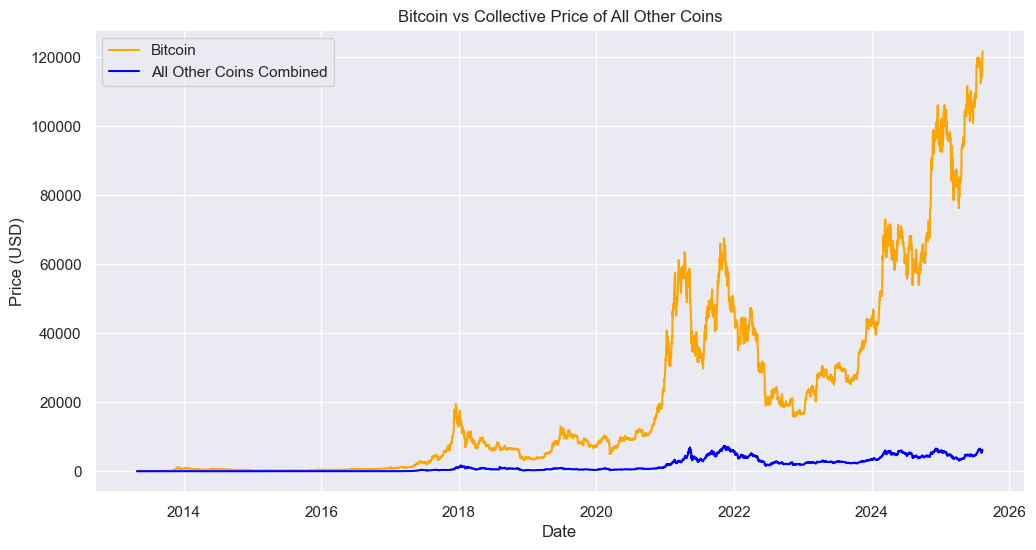

In [7]:

# Separate Bitcoin and others
btc_df = df[df['name'] == 'Bitcoin'][['date', 'price']]
others_df = df[df['name'] != 'Bitcoin'][['date', 'price']]

# Sum prices of other coins per date
others_total = others_df.groupby('date')['price'].sum().reset_index()

# Merge both into one DataFrame for aligned plotting
merged = pd.merge(btc_df, others_total, on='date', suffixes=('_bitcoin', '_others'))

# Plot
plt.figure(figsize=(12,6))
plt.plot(merged['date'], merged['price_bitcoin'], label='Bitcoin', color='orange')
plt.plot(merged['date'], merged['price_others'], label='All Other Coins Combined', color='blue')

plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin vs Collective Price of All Other Coins")
plt.legend()
plt.show()
